In [4]:
import random
import math
import os
import json
import shutil
from collections import defaultdict
from typing import List, Tuple

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
from scipy import ndimage
import cv2

import sys
sys.path.append("/Users/jocareher/Library/CloudStorage/OneDrive-Personal/Educación/PhD_UPF_2023/face_detection/scripts/")
import data_setup

In [3]:
data_setup.process_and_save_json("/Users/jocareher/Downloads/project-3-at-2024-03-13-09-13-33374d3f.json", "/Users/jocareher/Downloads/hdp_json_files")

In [1]:
def create_directories(path: str) -> None:
    """
    Ensure the existence of a directory.

    This function checks if a directory exists at the specified path,
    and if not, it creates the directory, including any necessary parent directories.

    Args:
        - path (str): The path to the directory that should exist.

    Returns:
        - None
    """
    os.makedirs(path, exist_ok=True)

def copy_corresponding_jsons(json_dir: str, images_dir: str, output_dir: str) -> None:
    """
    Copies .json files corresponding to the images in dir_images to the output_dir.

    Args:
        - json_dir (str): The directory where the .json files are located.
        - images_dir (str): The directory where the images are located.
        - output_dir (str): The directory where the corresponding .json files will be saved.
    """
    
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        create_directories(output_dir)
    
    # Get the base names of the image files (without the extension)
    image_names = [os.path.splitext(file)[0] for file in os.listdir(images_dir) if file.endswith('.jpg')]
    
    # Loop through the .json files in dir_json
    for json_file in os.listdir(json_dir):
        if json_file.endswith('.json'):
            # Get the base name of the .json file (without the extension)
            base_name_json: str = os.path.splitext(json_file)[0]
            
            # If the base name of the .json file is in the list of image names
            if base_name_json in image_names:
                # Build the full paths
                full_json_path: str = os.path.join(json_dir, json_file)
                destination_json_path: str = os.path.join(output_dir, json_file)
                
                # Copy the .json file to the output directory
                shutil.copy(full_json_path, destination_json_path)
                print(f'Copied: {json_file} to {output_dir}')
                
    print("Process completed.")

In [8]:
json_dir = "/Users/jocareher/Downloads/babyfaces_json_files"
images_dir = "/Users/jocareher/Downloads/test/images"
output_dir = "/Users/jocareher/Downloads/test/json"
copy_corresponding_jsons(json_dir=json_dir,
                         images_dir=images_dir,
                         output_dir=output_dir)

Copied: face_img_1002.json to /Users/jocareher/Downloads/test/json
Copied: face_img_1901.json to /Users/jocareher/Downloads/test/json
Copied: face_img_2291.json to /Users/jocareher/Downloads/test/json
Copied: face_img_2012.json to /Users/jocareher/Downloads/test/json
Copied: face_img_6952.json to /Users/jocareher/Downloads/test/json
Copied: face_bcn_406.json to /Users/jocareher/Downloads/test/json
Copied: face_img_7494.json to /Users/jocareher/Downloads/test/json
Copied: face_img_4484.json to /Users/jocareher/Downloads/test/json
Copied: face_img_6786.json to /Users/jocareher/Downloads/test/json
Copied: face_img_5903.json to /Users/jocareher/Downloads/test/json
Copied: face_img_3091.json to /Users/jocareher/Downloads/test/json
Copied: face_bcn_447.json to /Users/jocareher/Downloads/test/json
Copied: face_img_6694.json to /Users/jocareher/Downloads/test/json
Copied: face_img_376.json to /Users/jocareher/Downloads/test/json
Copied: face_img_6552.json to /Users/jocareher/Downloads/test/jso

In [28]:
def split_annotations_and_create_new_files_per_face(root_dir: str, output_dir: str) -> None:
    """
    Splits annotations in JSON and TXT files when there are multiple faces in a single image.
    It creates individual JSON, TXT, and copies of image files for each face.

    The function expects a directory structure with 'images', 'json', and 'labels' subdirectories
    in the provided root directory. It processes each JSON file and checks for multiple annotations (faces).
    For each face, it creates a new JSON and TXT file, and a copy of the corresponding image file, appending
    an identifier to the filename to distinguish between different faces.

    Args:
        - root_dir (str): The root directory that contains the 'images', 'json', and 'labels' directories.
        - output_dir (str): The output directory where the newly created files will be stored, maintaining the
                            original directory structure with 'images', 'json', and 'labels' subdirectories.

    Returns:
        - None
    """
    # Creating output images directory path
    output_images_dir = os.path.join(output_dir, 'images')  
    # Creating output JSON directory path
    output_json_dir = os.path.join(output_dir, 'json')      
    # Creating output labels directory path
    output_labels_dir = os.path.join(output_dir, 'labels')  
    
    # Creating output images directory
    create_directories(output_images_dir)  
    # Creating output JSON directory
    create_directories(output_json_dir)    
    # Creating output labels directory
    create_directories(output_labels_dir)  
    
    # Setting path to images directory in root directory
    images_dir = os.path.join(root_dir, 'images')  
    # Setting path to JSON directory in root directory
    json_dir = os.path.join(root_dir, 'json')      
    # Setting path to labels directory in root directory
    labels_dir = os.path.join(root_dir, 'labels')  
    
    # Looping through files in JSON directory
    for file_name in os.listdir(json_dir):  
        # Checking if file is a JSON file
        if file_name.endswith('.json'):      
            # Extracting base name of file
            base_name = os.path.splitext(file_name)[0]  
            # Setting path to current JSON file
            json_path = os.path.join(json_dir, file_name)  
            
            # Opening current JSON file
            with open(json_path, 'r') as f:  
                # Loading JSON data
                data = json.load(f)  
                
                # New JSON data with a single annotation
                # Creating new JSON data with single annotation
                if len(data['label']) > 1:  
                    # Looping through each annotation
                    for i, label in enumerate(data['label']):  
                        # Creating new JSON data with single annotation
                        new_data = {**data, 'label': [label]}  
                        # Setting path to new JSON file
                        new_json_path = os.path.join(output_json_dir, f'{base_name}_copy_{i}.json')  
                        
                        # Opening new JSON file
                        with open(new_json_path, 'w') as nf:  
                            # Writing new JSON data to file
                            json.dump(new_data, nf, indent=4)  
                        
                        # Setting path to corresponding TXT file
                        txt_path = os.path.join(labels_dir, f'{base_name}.txt')  
                        # Checking if TXT file exists
                        if os.path.exists(txt_path):  
                            # Opening corresponding TXT file
                            with open(txt_path, 'r') as tf:  
                                # Reading lines from TXT file
                                lines = tf.readlines()  
                                # Checking if current index is within the range of lines
                                if i < len(lines):  
                                    # Setting path to new TXT file
                                    new_txt_path = os.path.join(output_labels_dir, f'{base_name}_copy_{i}.txt')  
                                    
                                    # Opening new TXT file
                                    with open(new_txt_path, 'w') as ntf:  
                                        # Writing corresponding line to new TXT file
                                        ntf.write(lines[i])  
                        
                        # Setting path to corresponding image file
                        img_path = os.path.join(images_dir, f'{base_name}.jpg')  
                        # Checking if image file exists
                        if os.path.exists(img_path):  
                            # Setting path to new image file
                            new_img_path = os.path.join(output_images_dir, f'{base_name}_copy_{i}.jpg')  
                            # Copying image file with identifier
                            shutil.copy(img_path, new_img_path)  


In [85]:
root_dir = "/Users/jocareher/Downloads/test"
output_dir = "/Users/jocareher/Downloads/benchmark_test"
split_annotations_and_create_new_files_per_face(root_dir, output_dir)

In [90]:
def rotate_point(cx: float, cy: float, angle: float, px: float, py: float) -> Tuple[float, float]:
    """
    Rotate a point around a given center.

    Args:
        - cx: x-coordinate of the center point to rotate around.
        - cy: y-coordinate of the center point to rotate around.
        - angle: Angle in degrees to rotate the point in a clockwise direction.
        - px: x-coordinate of the point to rotate.
        - py: y-coordinate of the point to rotate.

    Returns:
        - The new x and y coordinates of the rotated point.

    The function converts the angle from degrees to radians and applies a standard rotation matrix
    to the point coordinates. The rotation is performed in a clockwise direction by negating the angle.
    """
    # Convert angle to radians
    angle_rad = np.radians(-angle)  # Negative for clockwise rotation
    s = np.sin(angle_rad)
    c = np.cos(angle_rad)

    # Translate point back to origin:
    px -= cx
    py -= cy

    # Rotate point
    xnew = px * c - py * s
    ynew = px * s + py * c

    # Translate point back
    px = xnew + cx
    py = ynew + cy
    return px, py

def get_rotated_bbox_coords(coords: list, rotation_angle: float, original_width: int, original_height: int) -> Tuple[int, int, int, int]:
    """
    Calculate the coordinates of a rotated bounding box after the image has been rotated by a specific angle.
    
    Args:
        - coords (list): List of original bounding box coordinates (x1, y1, x2, y2, x3, y3, x4, y4) as percentages of the image dimensions.
        - rotation_angle (float): The angle in degrees by which the image is rotated clockwise.
        - original_width (int): The width of the original image in pixels.
        - original_height (int): The height of the original image in pixels.

    Returns:
        - Tuple[int, int, int, int]: The top-left x and y coordinates, width, and height of the new axis-aligned bounding box in pixels.

    This function first converts the percentage coordinates into pixel values.
    It then computes the center of the original image and uses it as the pivot point to calculate the rotated coordinates of the bounding box.
    Finally, it determines the minimum axis-aligned bounding box that encapsulates the rotated coordinates.
    """
    # Convert percentage coordinates to pixels
    x1, y1 = coords[0] * original_width, coords[1] * original_height
    x2, y2 = coords[2] * original_width, coords[3] * original_height
    x3, y3 = coords[4] * original_width, coords[5] * original_height
    x4, y4 = coords[6] * original_width, coords[7] * original_height

    # Calculate the center of the original image
    original_center_x, original_center_y = original_width / 2, original_height / 2

    # Rotate the bounding box corners around the original image's center
    rot_x1, rot_y1 = rotate_point(original_center_x, original_center_y, rotation_angle, x1, y1)
    rot_x2, rot_y2 = rotate_point(original_center_x, original_center_y, rotation_angle, x2, y2)
    rot_x3, rot_y3 = rotate_point(original_center_x, original_center_y, rotation_angle, x3, y3)
    rot_x4, rot_y4 = rotate_point(original_center_x, original_center_y, rotation_angle, x4, y4)

    # Calculate the bounding box's new location in the rotated image
    rotated_center_x, rotated_center_y = rotate_point(original_center_x, original_center_y, rotation_angle, original_center_x, original_center_y)
    bbox_center_x, bbox_center_y = (rot_x1 + rot_x3) / 2, (rot_y1 + rot_y3) / 2
    new_cx, new_cy = rotated_center_x + (bbox_center_x - original_center_x), rotated_center_y + (bbox_center_y - original_center_y)

    # Calculate the top-left corner of the new bounding box
    new_x1, new_y1 = new_cx - (rot_x2 - rot_x1) / 2, new_cy - (rot_y3 - rot_y1) / 2
    # Calculate the width and height of the new bounding box
    new_width = np.sqrt((rot_x2 - rot_x1)**2 + (rot_y2 - rot_y1)**2)
    new_height = np.sqrt((rot_x3 - rot_x2)**2 + (rot_y3 - rot_y2)**2)

    # Return the new bounding box coordinates
    return int(new_x1), int(new_y1), int(new_width), int(new_height)

def get_new_image_dimensions(w: int, h: int, angle: float):
    """
    Calculates the new dimensions of the image after rotation.
    
    Args:
        - w (int): The original width of the image in pixels.
        - h (int): The original height of the image in pixels.
        - angle (float): The angle in degrees by which the image is rotated clockwise.

    Returns:
        - Tuple[int, int]: The new width and height of the image after rotation.

    This function calculates the new dimensions of an image after rotation by a given angle.
    It uses the formula:
    new_width = h * sin(angle) + w * cos(angle)
    new_height = h * cos(angle) + w * sin(angle)
    """
    angle_rad = np.radians(angle)
    cos_angle = abs(np.cos(angle_rad))
    sin_angle = abs(np.sin(angle_rad))
    
    # Calculate the new width and height of the image
    new_w = int((h * sin_angle) + (w * cos_angle))
    new_h = int((h * cos_angle) + (w * sin_angle))
    
    return new_w, new_h

def adjust_bbox_after_image_rotation(new_tl_x: int, new_tl_y: int, new_w: int, new_h: int, orig_cx: int, orig_cy: int, new_cx: int, new_cy: int):
    """
    Adjust the coordinates of the bounding box after the image has been rotated.
    
    Args:
        - new_tl_x (int): Top-left x-coordinate of the bounding box in the rotated image.
        - new_tl_y (int): Top-left y-coordinate of the bounding box in the rotated image.
        - new_w (int): Width of the bounding box.
        - new_h (int): Height of the bounding box.
        - orig_cx (int): Original center x-coordinate of the image before rotation.
        - orig_cy (int): Original center y-coordinate of the image before rotation.
        - new_cx (int): New center x-coordinate of the rotated image.
        - new_cy (int): New center y-coordinate of the rotated image.
        
    Returns:
        tuple: Adjusted coordinates of the bounding box (top-left x, top-left y, width, height).

    This function adjusts the coordinates of a bounding box after the image has been rotated.
    It calculates the shift of the center of the bounding box after rotation and adjusts the top-left coordinates accordingly.
    """
    # Calculate the shift of the center after rotation
    shift_x = new_cx - orig_cx
    shift_y = new_cy - orig_cy

    # Adjust the bounding box coordinates by the shift
    adjusted_x = int(new_tl_x + shift_x)
    adjusted_y = int(new_tl_y + shift_y)

    return adjusted_x, adjusted_y, new_w, new_h

def visualize_rotated_images_and_aabboxes(root_dir: str,
                                          output_dir: str,
                                          max_images_per_grid: int,
                                          display_grid: bool = True,
                                          normalized_coords: bool = True) -> None:
    """
    Processes images by rotating them, calculating new bounding box coordinates, saving them in specified directories,
    and optionally displaying a selection of them in a grid.

    Args:
        root_dir: The root directory containing 'json', 'images', and 'labels' subdirectories.
        output_dir: The output directory where 'images' and 'labels' folders will be created.
        max_images_per_grid: The maximum number of images to display or process per grid.
        display_grid: Flag to decide if a grid of images is to be displayed.
        normalized_coords: Flag to decide if bounding box coordinates should be saved as normalized values or pixels.
    """
    # Ensure output directories exist
    images_output_dir = os.path.join(output_dir, 'images')
    labels_output_dir = os.path.join(output_dir, 'labels')
    create_directories(images_output_dir)
    create_directories(labels_output_dir)
    
    # JSON, Images and Labels directory paths
    json_dir = os.path.join(root_dir, 'json')
    images_dir = os.path.join(root_dir, 'images')
    labels_dir = os.path.join(root_dir, 'labels')

    # Get all image files and select random images for display
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') and not f.startswith('._')]
    random.shuffle(image_files)
    images_to_display = image_files[:max_images_per_grid] if display_grid else []
    
    # Create grid for visualization if needed
    if display_grid:
        # Initialize the grid only if display is needed
        rows = cols = int(np.ceil(np.sqrt(len(images_to_display))))
        fig, axs = plt.subplots(rows, cols, figsize=(20, rows * 5))
        axs = axs.ravel() if rows * cols > 1 else [axs]

    for idx, image_file in enumerate(image_files):
        # Paths for current image and annotation files
        image_path = os.path.join(images_dir, image_file)
        base_name = os.path.splitext(image_file)[0]
        json_path = os.path.join(json_dir, base_name + '.json')
        txt_path = os.path.join(labels_dir, base_name + '.txt')

        # Process JSON and TXT files
        with open(json_path, 'r') as json_file:
            annotation_data = json.load(json_file)
            bbox_data = annotation_data['label'][0]

            # Process image
            image = cv2.imread(image_path)
            rotated_image = ndimage.rotate(image, bbox_data['rotation'], reshape=True)

            # Process bounding box
            with open(txt_path, 'r') as f:
                coords = [float(i) for i in f.read().split()[1:]]
            new_tl_x, new_tl_y, new_w, new_h = get_rotated_bbox_coords(coords,
                                                                       bbox_data['rotation'],
                                                                       bbox_data['original_width'],
                                                                       bbox_data['original_height'])
            
            new_img_width, new_img_height = get_new_image_dimensions(bbox_data['original_width'],
                                                                     bbox_data['original_height'],
                                                                     bbox_data['rotation'])
            
            adjusted_bbox_coords = adjust_bbox_after_image_rotation(new_tl_x,
                                                                    new_tl_y,
                                                                    new_w,
                                                                    new_h,
                                                                    bbox_data['original_width'] / 2,
                                                                    bbox_data['original_height'] / 2,
                                                                    new_img_width / 2,
                                                                    new_img_height / 2)

            # Save rotated image
            cv2.imwrite(os.path.join(images_output_dir, image_file), rotated_image)

            # Save bounding box coordinates
            bbox_file_path = os.path.join(labels_output_dir, f"{base_name}.txt")
            with open(bbox_file_path, 'w') as f:
                if normalized_coords:
                    adjusted_bbox_coords_percentage = [
                        adjusted_bbox_coords[0] / new_img_width,
                        adjusted_bbox_coords[1] / new_img_height,
                        adjusted_bbox_coords[2] / new_img_width,
                        adjusted_bbox_coords[3] / new_img_height
                    ]
                    f.write(' '.join(map(str, adjusted_bbox_coords_percentage)) + '\n')
                else:
                    f.write(f"{adjusted_bbox_coords[0]} {adjusted_bbox_coords[1]} {adjusted_bbox_coords[2]} {adjusted_bbox_coords[3]}\n")

            # If display_grid is True, display only the selected images
            if display_grid and image_file in images_to_display:
                display_idx = images_to_display.index(image_file)
                # Draw bounding box on image for display
                display_img = cv2.rectangle(rotated_image,
                                            (adjusted_bbox_coords[0], adjusted_bbox_coords[1]),
                                            (adjusted_bbox_coords[0] + adjusted_bbox_coords[2], adjusted_bbox_coords[1] + adjusted_bbox_coords[3]),
                                            (0, 255, 0), 2)
                # Convert image for display
                display_img = cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB)
                # Display image in the grid
                ax = axs[display_idx]
                ax.imshow(display_img)
                ax.axis('on')
                # Set the title with the image name
                ax.set_title(base_name, fontsize=10)

    # Only show the grid if we're displaying
    if display_grid:
        # Hide any unused subplots if there are fewer images than grid cells
        for ax in axs[len(images_to_display):]:
            ax.axis('off')
        # Tight layout often produces better-looking grids
        plt.tight_layout()
        plt.show()

In [10]:
def draw_bounding_boxes_and_save_images(root_dir: str, output_dir: str):
    """
    Read images and corresponding bounding box annotations from the root directory,
    draw bounding boxes on the images, and save the annotated images to the output directory.

    Args:
        - root_dir (str): The root directory containing 'images' and 'labels' subdirectories.
        - output_dir (str): The directory where annotated images will be saved.

    Returns:
        None
    """

    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        create_directories(output_dir)

    # List files in the root directory
    for filename in os.listdir(os.path.join(root_dir, 'images')):
        if filename.endswith('.jpg'):
            image_path = os.path.join(root_dir, 'images', filename)
            label_path = os.path.join(root_dir, 'labels', filename.replace('.jpg', '.txt'))

            # Read image
            image = cv2.imread(image_path)

            # Read bounding box annotations
            with open(label_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    # Extract bounding box coordinates
                    x, y, w, h = map(int, line.strip().split())

                    # Draw bounding box on the image
                    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)

            # Save image with bounding boxes
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, image)

            print(f"Processed: {filename}")

In [11]:
# Example usage:
root_directory = "/Users/jocareher/Downloads/benchmark_test"
output_directory = "/Users/jocareher/Downloads/rotated_images_with_labels"
draw_bounding_boxes(root_directory, output_directory)

Processed: face_img_481.jpg
Processed: face_img_481.jpg
Processed: flip_face_img_2180.jpg
Processed: flip_face_img_2180.jpg
Processed: face_img_1214.jpg
Processed: face_img_1214.jpg
Processed: face_img_3371.jpg
Processed: face_img_3371.jpg
Processed: face_img_7117.jpg
Processed: face_img_7117.jpg
Processed: face_img_6584.jpg
Processed: face_img_6584.jpg
Processed: face_img_2090.jpg
Processed: face_img_2090.jpg
Processed: flip_face_img_2631.jpg
Processed: flip_face_img_2631.jpg
Processed: flip_face_bcn_15.jpg
Processed: flip_face_bcn_15.jpg
Processed: face_img_697.jpg
Processed: face_img_697.jpg
Processed: flip_face_img_65.jpg
Processed: flip_face_img_65.jpg
Processed: face_img_7329.jpg
Processed: face_img_7329.jpg
Processed: face_img_6779.jpg
Processed: face_img_6779.jpg
Processed: face_img_1002.jpg
Processed: face_img_1002.jpg
Processed: face_img_6786.jpg
Processed: face_img_6786.jpg
Processed: face_img_6976.jpg
Processed: face_img_6976.jpg
Processed: flip_face_img_548.jpg
Processed: 

In [27]:
def plot_images_with_labels_and_obboxes(
    root_dir: str, output_dir: str, line_thickness: int = 5, font_size: int = 20
):
    """
    Processes all images in a directory, draws oriented bounding boxes and the class index with specified line thickness and font size,
    and saves the resulting images using matplotlib.

    Args:
    - root_dir (str): Root directory containing 'images' and 'labels' folders.
    - output_dir (str): Directory where the resulting images will be saved.
    - line_thickness (int): Line thickness of the bounding boxes.
    - font_size (int): Font size for the class text.
    """
    images_dir = os.path.join(root_dir, "images")
    labels_dir = os.path.join(root_dir, "labels")

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        create_directories(output_dir)

    # Iterate over each file in the images directory
    for image_name in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image_name)
        
        # Skip files that are not regular image files
        try:
            image = Image.open(image_path)
        except:
            print(f"Skipping file: {image_name}")
            continue
        
        # Create a matplotlib figure and axis with the original image size
        fig, ax = plt.subplots(figsize=(image.width / 100, image.height / 100), dpi=100)
        # Display the image
        ax.imshow(image)

        # Check if there is a corresponding label file
        base_name = os.path.splitext(image_name)[0]
        bbox_path = os.path.join(labels_dir, base_name + ".txt")

        if os.path.exists(bbox_path):
            with open(bbox_path, "r") as file:
                for line in file:
                    # Parse bounding box data from the label file
                    bbox_data = line.strip().split()
                    # Extract the class index from the bounding box data
                    class_index = bbox_data[0]
                    # Convert normalized coordinates to absolute
                    coordinates = [float(coord) for coord in bbox_data[1:]]
                    absolute_coordinates = [
                        (coordinates[i] * image.width, coordinates[i + 1] * image.height)
                        for i in range(0, len(coordinates), 2)
                    ]

                    # Create a polygon for the bbox and add it to the axis
                    polygon = patches.Polygon(
                        absolute_coordinates,
                        closed=True,
                        linewidth=line_thickness,
                        edgecolor="purple",
                        facecolor="none",
                    )
                    ax.add_patch(polygon)

                    # Draw the class index on the image
                    label_x, label_y = absolute_coordinates[0]
                    # Add class index text near the bounding box
                    ax.text(
                        label_x,
                        label_y,
                        class_index,
                        verticalalignment="top",
                        color="green",
                        fontsize=font_size,
                        weight="bold",
                    )

        # Save the resulting image
        output_image_path = os.path.join(output_dir, image_name)
        # Remove axes and margins before saving
        plt.axis("off")
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        # Save the image with tight bounding box and no padding
        plt.savefig(output_image_path, bbox_inches="tight", pad_inches=0)
        # Close the plot to free memory
        plt.close()

    print(f"All images have been processed and saved in {output_dir}")

In [29]:
plot_images_with_labels_and_obboxes("/Users/jocareher/Downloads/test", "/Users/jocareher/Downloads/original_obb", font_size=25)

Skipping file: ._face_img_2848.jpg
Skipping file: ._face_img_3559.jpg
Skipping file: ._face_img_5882.jpg
Skipping file: ._face_img_2109.jpg
Skipping file: ._face_img_7298.jpg
Skipping file: ._face_img_1831.jpg
Skipping file: ._face_img_6623.jpg
Skipping file: ._face_img_1164.jpg
Skipping file: ._face_img_7313.jpg
Skipping file: ._face_img_2928.jpg
Skipping file: ._face_img_2733.jpg
Skipping file: ._face_img_3439.jpg
Skipping file: ._face_img_1560.jpg
Skipping file: ._face_img_3405.jpg
Skipping file: ._face_img_2040.jpg
Skipping file: ._face_img_6540.jpg
Skipping file: ._face_img_6554.jpg
Skipping file: ._face_img_6232.jpg
Skipping file: ._face_img_2929.jpg
Skipping file: ._face_bcn_527.jpg
Skipping file: ._face_img_1777.jpg
Skipping file: ._face_bcn_15.jpg
Skipping file: ._face_img_4633.jpg
Skipping file: ._face_img_65.jpg
Skipping file: ._face_img_2295.jpg
Skipping file: ._face_img_1165.jpg
Skipping file: ._face_img_515.jpg
Skipping file: ._face_img_1830.jpg
Skipping file: ._face_img_

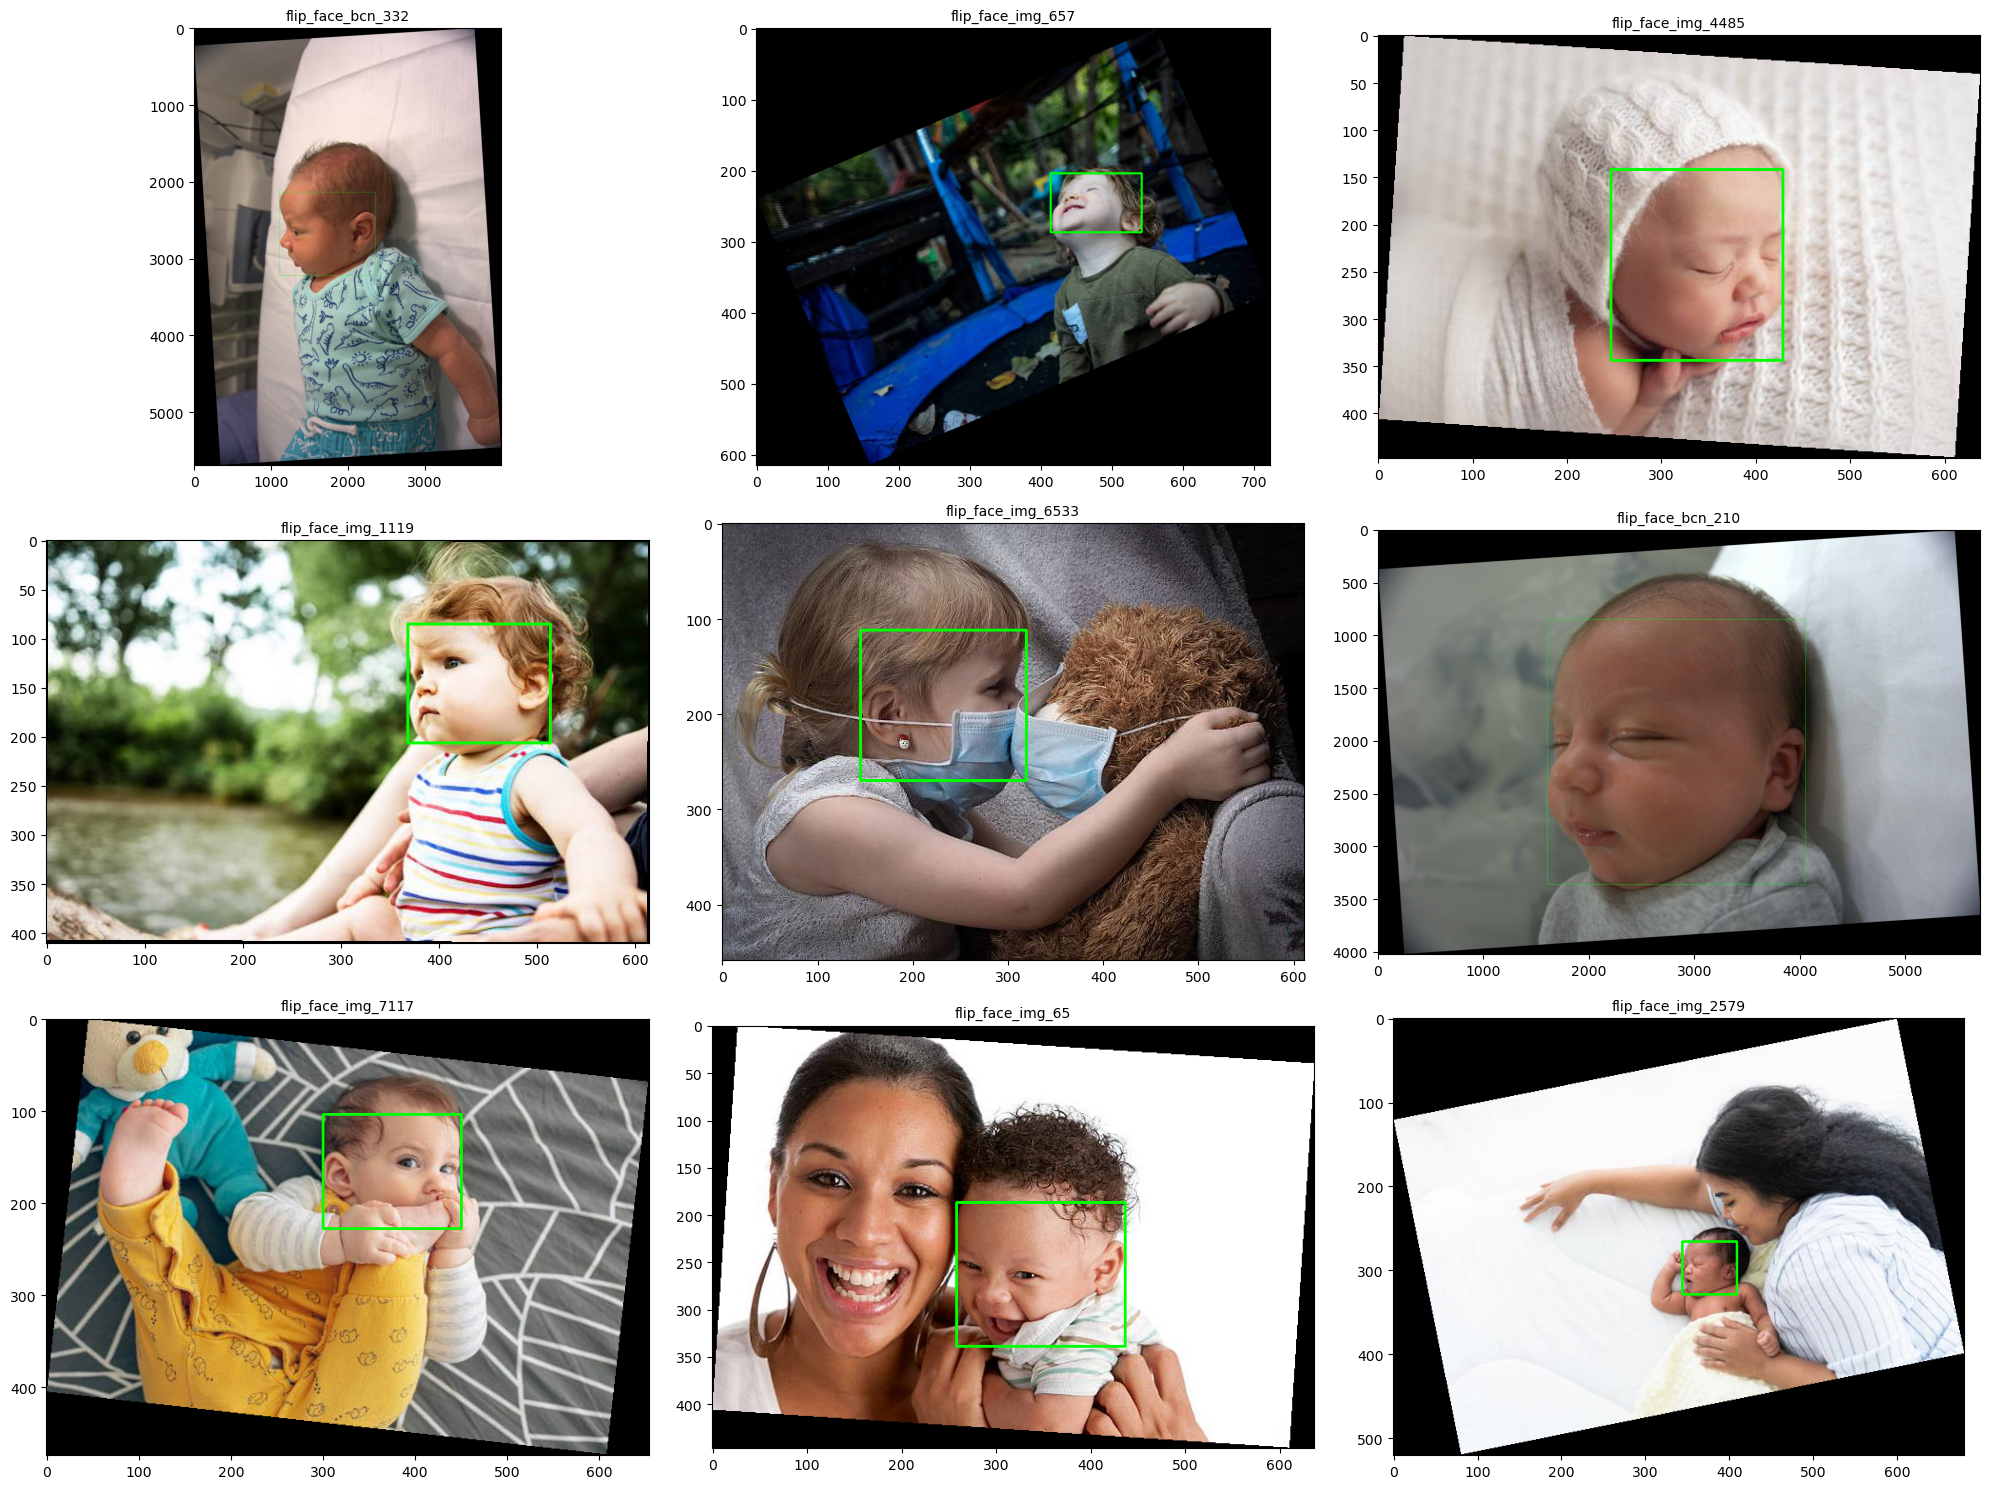

In [101]:
visualize_rotated_images_and_aabboxes("/Users/jocareher/Downloads/new_flipped_images_test", "/Users/jocareher/Downloads/prueba", 9, True, False)

In [99]:
def flip_rotation_in_json_file(json_folder_path: str, output_dir: str) -> None:
    """
    Flip the rotation value in each label of JSON files in the specified folder and save them in a new directory.

    Args:
        - json_folder_path (str): Path to the folder containing JSON files.
        - output_dir (str): Path to the output directory where modified JSON files will be saved.
    """
    # Ensure output directory exists
    if not os.path.exists(output_dir):
        create_directories(output_dir)
    
    # Iterate over .json files in the json_folder_path folder
    for json_file in os.listdir(json_folder_path):
        if json_file.endswith(".json"):
            # Build the full path to the current .json file
            json_path = os.path.join(json_folder_path, json_file)
            
            # Read the contents of the .json file
            with open(json_path, 'r') as file:
                data = json.load(file)
                
                # Modify the value of 'rotation' in each label to its opposite
                for label in data["label"]:
                    label["rotation"] = -label["rotation"]
            
            # Generate the new filename based on the associated image name
            new_json_filename = json_file.replace("face_", "flip_face_")
            
            # Build the full path to the new .json file in the output directory
            new_json_path = os.path.join(output_dir, new_json_filename)
            
            # Save the modified data to the new .json file
            with open(new_json_path, 'w') as file:
                json.dump(data, file, indent=4)

def delete_json_without_jpg(json_folder: str, images_folder: str) -> None:
    """
    Delete JSON files in the specified folder if the corresponding JPG file does not exist in the images folder.

    Args:
        - json_folder (str): Path to the folder containing JSON files.
        - images_folder (str): Path to the folder containing JPG images.
    """
    # Create a set of base filenames of JPG files (without the extension)
    jpg_files = {os.path.splitext(filename)[0] for filename in os.listdir(images_folder) if filename.endswith('.jpg')}
    
    # Iterate over .json files in the specified folder
    for json_filename in os.listdir(json_folder):
        if json_filename.endswith('.json'):
            # Extract the base filename of the .json file to compare with JPG files
            base_json_filename = os.path.splitext(json_filename)[0]
            
            # Check if the corresponding JPG file exists
            if base_json_filename not in jpg_files:
                # The corresponding JPG file doesn't exist, delete the .json file
                os.remove(os.path.join(json_folder, json_filename))
                print(f"Deleted: {json_filename}")

# Uso de la función
json_folder_path = '/Users/jocareher/Downloads/test/json'
images_folder_path = '/Users/jocareher/Downloads/new_flipped_images_test/images'
output_dir = '/Users/jocareher/Downloads/new_flipped_images_test/json'

flip_rotation_in_json_file(json_folder_path, images_folder_path, output_dir)

In [2]:
def read_bboxes(file_path: str, format: str = 'detection') -> list:
    """
    Reads bounding boxes from a text file and returns them as a list of lists.

    Args:
        - file_path (str): Path to the text file containing bounding box coordinates.
        - format (str): Format of the bounding boxes. It can be 'detection' or 'ground_truth'.

    Returns:
        - list: List of lists containing the bounding box coordinates.

    Description:
        This function reads the bounding box coordinates from a text file and returns them as a list of lists.
        If the format is 'ground_truth', it converts the coordinates from (x, y, w, h) format to (x1, y1, x2, y2) format to ensure consistency.
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()
    if format == 'ground_truth':
        # Converts ground truth from (x, y, w, h) to (x1, y1, x2, y2)
        bboxes = [list(map(float, line.strip().split())) for line in lines]
        bboxes = [[x, y, x + w, y + h] for x, y, w, h in bboxes]
    else:
        # Assumes detection format is already (x1, y1, x2, y2)
        bboxes = [list(map(float, line.strip().split())) for line in lines]
    return bboxes

def iou_aabb(bbox1: list, bbox2: list) -> float:
    """
    Calculates the Intersection over Union (IoU) between two Axis-Aligned Bounding Boxes (AABB).

    Args:
        - bbox1 (list): Coordinates of the first bounding box [x1, y1, x2, y2].
        - bbox2 (list): Coordinates of the second bounding box [x1, y1, x2, y2].

    Returns:
        - float: IoU value between the two bounding boxes.

    Description:
        This function calculates the Intersection over Union (IoU) between two Axis-Aligned Bounding Boxes (AABB).
        It first determines the coordinates of the intersection rectangle and then calculates the area of intersection.
        Then, it calculates the IoU using the intersection area and the area of both bounding boxes.
    """
    # Calculate the (x, y) coordinates of the intersection rectangle
    x_left = max(bbox1[0], bbox2[0])
    y_top = max(bbox1[1], bbox2[1])
    x_right = min(bbox1[2], bbox2[2])
    y_bottom = min(bbox1[3], bbox2[3])

    # Check if there is no intersection
    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # Calculate intersection area
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    # Calculate the areas of both bounding boxes
    bbox1_area = (bbox1[2] - bbox1[0]) * (bbox1[3] - bbox1[1])
    bbox2_area = (bbox2[2] - bbox2[0]) * (bbox2[3] - bbox2[1])
    # Calculate IoU
    iou = intersection_area / float(bbox1_area + bbox2_area - intersection_area)
    return iou

def compute_detection_metrics(det_path: str, gt_path: str) -> tuple:
    """
    Computes detection metrics (precision, recall, F1-score) for a set of detection results against ground truth annotations.
    
    This function calculates the following metrics:
        - Precision: The ratio of true positive detections to the total number of positive predictions made. 
        It is calculated as TP / (TP + FP), where TP is the number of true positives (detections that correctly match a ground truth bounding box with IoU >= 0.5) 
        and FP is the number of false positives (detections that do not correctly match any ground truth bounding box or match already detected ground truth bounding box).
    
        - Recall: The ratio of true positive detections to the total number of actual positives (ground truth bounding boxes). 
        It is calculated as TP / (TP + FN), where FN is the number of false negatives (ground truth bounding boxes that were not detected by any detection bounding box).
    
        - F1-Score: The harmonic mean of precision and recall, providing a single metric to assess the balance between them. 
        It is calculated as 2 * (precision * recall) / (precision + recall), giving equal weight to both precision and recall.
    
    Args:
        - det_path (str): Path to the directory containing detection bounding box files (.txt format), where each file contains bounding boxes for detections in an image.
        - gt_path (str): Path to the directory containing ground truth bounding box files (.txt format), where each file contains bounding boxes for actual objects in the corresponding image.
    
    Returns:
        - tuple: Contains calculated precision, recall, and F1-score. Each metric is a float value between 0 and 1, where 1 indicates perfect precision, recall, or F1-score.
    
    Note:
        - This function assumes that each detection and ground truth file corresponds to one image and that the files are named such that detection and ground truth files match.
        - The function calculates the Intersection over Union (IoU) to determine matches between detection and ground truth bounding boxes. 
            A detection is considered a true positive if it has an IoU of 0.5 or higher with any ground truth bounding box.
        - Ground truth bounding boxes that do not have any matching detection bounding box with an IoU of 0.5 or higher are considered false negatives.
        - Detections that do not match any ground truth bounding box with an IoU of 0.5 or higher are considered false positives.
    """
    # List and sort detection and ground truth files
    det_files = sorted([f for f in os.listdir(det_path) if f.endswith('.txt')])
    gt_files = sorted([f for f in os.listdir(gt_path) if f.endswith('.txt')])

    # Initialize counters for true positives (TP), false positives (FP), and false negatives (FN)
    tp, fp, fn = 0, 0, 0

    # Iterate over ground truth files and corresponding detection files
    for gt_file in gt_files:
        gt_bboxes = read_bboxes(os.path.join(gt_path, gt_file), format='ground_truth')
        det_bboxes = read_bboxes(os.path.join(det_path, gt_file)) if gt_file in det_files else []

        # Track matched ground truth bounding boxes to avoid double counting
        matched = [False] * len(gt_bboxes)

        # Compare each detection bbox with each ground truth bbox
        for det_bbox in det_bboxes:
            iou_scores = [iou_aabb(det_bbox, gt_bbox) for gt_bbox in gt_bboxes]
            if iou_scores:
                best_iou_index = np.argmax(iou_scores)
                best_iou = iou_scores[best_iou_index]
                # If best IoU is above the threshold, count as TP or FP
                if best_iou >= 0.5:
                    if not matched[best_iou_index]:
                        tp += 1
                        matched[best_iou_index] = True
                    else:
                        fp += 1
                else:
                    fp += 1

        # Count unmatched ground truth bboxes as FN
        fn += len(gt_bboxes) - sum(matched)

    # Calculate precision, recall, and F1-score
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

    return precision, recall, f1_score

In [5]:
det_path = '/Users/jocareher/Downloads/MogFace/predictions/labels'
gt_path = '/Users/jocareher/Downloads/benchmark_test/labels'
precision, recall, f1_score = compute_detection_metrics(det_path, gt_path)
print(f"F1 Score: {f1_score:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f} ")

F1 Score: 0.8316, Precision: 0.8081, Recall: 0.8566 


In [31]:
import os
import shutil

def copy_missing_files(pred_path, gt_path, dest_path):
    """
    Copia los archivos .txt de ground truths que no tienen un archivo correspondiente
    en la carpeta de predicciones a una carpeta destino especificada.

    Args:
    - pred_path (str): Ruta al directorio que contiene los archivos de predicciones.
    - gt_path (str): Ruta al directorio que contiene los archivos de ground truths.
    - dest_path (str): Ruta al directorio destino donde se copiarán los archivos faltantes.

    Returns:
    - List[str]: Lista de nombres de archivos copiados al directorio destino.
    """
    # Asegurarse de que el directorio destino existe
    if not os.path.exists(dest_path):
        create_directories(dest_path)

    # Listar todos los archivos .txt en ambas carpetas
    pred_files = {os.path.splitext(f)[0] for f in os.listdir(pred_path) if f.endswith('.jpg')}
    gt_files = {os.path.splitext(f)[0] for f in os.listdir(gt_path) if f.endswith('.jpg')}

    # Encuentra la diferencia: archivos en gt que no están en pred
    missing_files = gt_files - pred_files
    copied_files = []

    for file_name in missing_files:
        src_file_path = os.path.join(gt_path, file_name + '.jpg')
        dest_file_path = os.path.join(dest_path, file_name + '.jpg')
        shutil.copy(src_file_path, dest_file_path)
        copied_files.append(file_name)

    return copied_files

In [33]:
copy_missing_files("/Users/jocareher/Downloads/retina_predictions/images", "/Users/jocareher/Downloads/benchmark_test/images", "/Users/jocareher/Downloads/missing_images_retina")

['face_img_7403',
 'face_img_747',
 'face_img_353',
 'face_img_3178',
 'face_img_3559',
 'flip_face_bcn_488',
 'flip_face_img_6694',
 'face_img_6419',
 'flip_face_img_353',
 'face_img_6845',
 'face_img_3366',
 'face_img_6694',
 'flip_face_img_6845',
 'flip_face_img_1871',
 'face_img_7504']

In [4]:
def convert_obb_to_aabb(root_dir: str, dest_dir: str, save_label: bool = False) -> None:
    """
    Converts Oriented Bounding Box (OBB) annotations to Axis-Aligned Bounding Box (AABB) annotations and adjusts the coordinates to the actual dimensions of the images.
    
    Args:
        - root_dir (str): The root directory containing 'images' and 'labels' folders.
        - dest_dir (str): The destination directory to save the converted annotations.
        - save_label (bool, optional): Whether to save the class label with the annotations. Defaults to False.
    """
    labels_dir = os.path.join(root_dir, 'labels')
    images_dir = os.path.join(root_dir, 'images')
    
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        create_directories(dest_dir)
    
    # Iterate through all label files in the labels directory
    for label_file in os.listdir(labels_dir):
        # Check if the file is a text file (.txt)
        if label_file.endswith('.txt'):
            # Construct the corresponding image path
            image_path = os.path.join(images_dir, label_file.replace('.txt', '.jpg'))
            # Path to the original label file
            label_path = os.path.join(labels_dir, label_file)
            # Destination path for the converted label file
            dest_path = os.path.join(dest_dir, label_file)
            
            # Read the dimensions of the image
            image = cv2.imread(image_path)
            height, width, _ = image.shape
            
            with open(label_path, 'r') as file:
                # Read all lines (annotations) in the label file
                lines = file.readlines()
            
            with open(dest_path, 'w') as file:
                for line in lines:
                    # Split each line and convert coordinates to floats, skipping the class index if necessary
                    parts = line.strip().split()
                    obb_coords = list(map(float, parts[1:]))  # Convert to float and omit the class index
                    
                    # Convert OBB coordinates to AABB
                    x_coords = obb_coords[0::2]  # Extract x coordinates
                    y_coords = obb_coords[1::2]  # Extract y coordinates
                    # Find the minimum and maximum x and y coordinates
                    x_min, y_min, x_max, y_max = min(x_coords), min(y_coords), max(x_coords), max(y_coords)
                    
                    # Denormalize the coordinates
                    x_min, x_max = int(x_min * width), int(x_max * width)
                    y_min, y_max = int(y_min * height), int(y_max * height)
                    
                    # Write the converted annotation to the destination file
                    if save_label:
                        # Include the class label in the annotation
                        file.write(f"{parts[0]} {x_min} {y_min} {x_max} {y_max}\n")
                    else:
                        # Exclude the class label from the annotation
                        file.write(f"{x_min} {y_min} {x_max} {y_max}\n")

In [14]:
def flip_coordinates(labels: List[str]) -> List[str]:
    """
    Updates the class and coordinates of a YOLO label after a horizontal flip of the image.

    Args:
        - labels: List of strings, where the first element is the class index, and the following eight are coordinates.

    Returns:
        - List of strings updated with the flipped class and modified coordinates.
    """
    # Update class
    class_id = int(labels[0])
    # Swap class indices for side and 3/4 views
    if class_id in [0, 1]:
        labels[0] = str(1 - class_id)
    elif class_id in [3, 4]:
        labels[0] = str(7 - class_id)
    
    # Update coordinates
    coords = np.array(labels[1:], dtype=float).reshape(4, 2)
    coords[:, 0] = 1 - coords[:, 0]  # Reflect the x coordinates
    coords = coords[[1, 0, 3, 2], :]  # Reorder points to maintain bounding box consistency
    
    return [labels[0]] + coords.flatten().tolist()

def generate_horizontal_flipped_images(root_dir: str, output_dir: str) -> None:
    """
    Processes a directory of images and labels, applying a horizontal flip to images with a single annotation
    of certain classes and updating their labels accordingly.

    Args:
        - root_dir: Root directory containing 'images' and 'labels' folders.
        - output_dir: Output directory where the modified images and labels will be saved.
    """
    images_dir = os.path.join(root_dir, 'images')
    labels_dir = os.path.join(root_dir, 'labels')
    
    # Create output directories if they do not exist
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'labels'), exist_ok=True)
    
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpg'):  # Ensure only .jpg images are processed
            image_path = os.path.join(images_dir, filename)
            label_path = os.path.join(labels_dir, filename.replace('.jpg', '.txt'))
            
            if not os.path.exists(label_path):  # Skip images without a corresponding label file
                continue  # Move to the next image in the directory
            
            # Read and process label
            with open(label_path, 'r') as file:
                labels = file.readlines()
            
            if len(labels) == 1:  # Process only if there is a single annotation
                label = labels[0].strip().split()
                if int(label[0]) in [0, 1, 3, 4]:  # Check if the annotation is of an interested class
                    image = Image.open(image_path)
                    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)  # Apply horizontal flip
                    
                    new_label = flip_coordinates(label)  # Update label
                    
                    # Construct filename with 'flip_' prefix
                    new_filename = f"flip_{filename}"
                    flipped_image.save(os.path.join(output_dir, 'images', new_filename))  # Save modified image
                    
                    new_label_str = ' '.join(map(str, new_label))
                    with open(os.path.join(output_dir, 'labels', new_filename.replace('.jpg', '.txt')), 'w') as f:
                        f.write(new_label_str)  # Save modified label
                        
    print(f'All images and labels have been flipped and saved in {output_dir}')

In [16]:
root_dir = "/Users/jocareher/Downloads/train_val_test_split/test"
dest = "/Users/jocareher/Downloads/new_flipped_images_test"
generate_horizontal_flipped_images(root_dir, dest)

In [18]:
def count_labels_per_class_and_set(root_path: str) -> None:
    """
    Counts the number of labels per class across different dataset sets (train, val, test) and prints the counts.
    The function assumes that each set contains a 'labels' directory with text files, each line of which represents
    an annotation for an image in the format: class_index x1 y1 x2 y2 x3 y3 x4 y4.

    Args:
    - root_path (str): The root directory containing 'train', 'val', and 'test' subdirectories.

    Each subdirectory should have a 'labels' folder with .txt files for annotations. The function maps class indices
    to class names and prints the count of labels for each class within each dataset set.
    """
    # Mapping of class indices to their names for printing
    class_names = {
        0: "3/4_left_sideview",
        1: "3/4_right_sideview",
        2: "Frontal",
        3: "Left_sideview",
        4: "Right_sideview"
    }
    
    # Define subdirectories to explore
    subdirectories = ['train', 'val', 'test']
    
    # Iterate through each subdirectory
    for subdirectory in subdirectories:
        path_labels = os.path.join(root_path, subdirectory, 'labels')
        # Dictionary to count occurrences of each class in the current subdirectory
        class_counts = defaultdict(int)
        
        # List all .txt files in the labels subdirectory
        label_files = [f for f in os.listdir(path_labels) if f.endswith('.txt')]
        
        # Read each file and count the labels
        for file in label_files:
            with open(os.path.join(path_labels, file), 'r') as f:
                for line in f:
                    # Ensure the line is not empty
                    data = line.strip().split()
                    if data:
                        class_index = int(data[0])
                        class_counts[class_index] += 1
        
        # Print the count of labels per class for the current subdirectory in the specified order
        print(f"Label count for the {subdirectory} set:")
        for class_index in sorted(class_names.keys()):
            class_name = class_names[class_index]
            count = class_counts[class_index]
            print(f"  {class_name}: {count}")
        print("")  # Blank line to separate the sets

In [22]:
# Uso de la función
path_raiz = '/Users/jocareher/Downloads/face_dataset/original_images'
count_labels_per_class_and_set(path_raiz)

Label count for the train set:
  3/4_left_sideview: 563
  3/4_right_sideview: 523
  Frontal: 3941
  Left_sideview: 246
  Right_sideview: 288

Label count for the val set:
  3/4_left_sideview: 74
  3/4_right_sideview: 75
  Frontal: 593
  Left_sideview: 48
  Right_sideview: 43

Label count for the test set:
  3/4_left_sideview: 95
  3/4_right_sideview: 81
  Frontal: 589
  Left_sideview: 44
  Right_sideview: 27



In [29]:
def calculate_rotated_bbox_for_yolo_v8(data: dict, original_size: bool = False, image_resize: tuple = (640, 640), output_format: str = "absolute") -> list[tuple]:
    """
    Calculate the coordinates of the corners of a rotated bounding box based on Label Studio's annotation method,
    where rotation is around the top-left corner. Supports output in absolute coordinates, normalized relative to
    the original image size, or normalized relative to a resized image dimension.
    
    Args:
    - data (dict): Dictionary containing normalized bounding box information and rotation.
    - original_size (bool): Whether to use the original image dimensions.
    - image_resize (tuple): Resize dimensions (width, height), used if original_size is False.
    - output_format (str): Specifies the output format ("absolute", "normalized_original", "normalized_resized").
    
    Returns:
    - list of tuple: Coordinates of bounding box corners in the requested format.
    """
    # Choose scaling factors based on the specified dimensions and output format.
    width_factor = data["original_width"] if original_size else image_resize[0]
    height_factor = data["original_height"] if original_size else image_resize[1]

    # Convert normalized dimensions to absolute or normalized based on the chosen factors.
    width = data['width'] / 100 * width_factor
    height = data['height'] / 100 * height_factor
    top_left_x = data['x'] / 100 * width_factor
    top_left_y = data['y'] / 100 * height_factor
    
    # Convert rotation angle to radians.
    angle_rad = math.radians(data['rotation'])

    # Define corners based on top-left reference for rotation.
    corners = [(0, 0), (width, 0), (width, height), (0, height)]

    # Rotate each corner around the top-left corner
    rotated_corners = []
    for x, y in corners:
        # Apply the rotation matrix to each corner point. 
        # For a point (x, y) and a rotation angle theta, the new position (rotated_x, rotated_y) is calculated as follows:
        # rotated_x = x * cos(theta) - y * sin(theta)
        # rotated_y = x * sin(theta) + y * cos(theta)
        # This formula is derived from the standard 2D rotation matrix.
        # After rotation, the new points are not relative to the top-left corner of the image anymore.
        # So we need to translate the rotated points back by adding the absolute coordinates of the top-left corner.
        rotated_x = (x * math.cos(angle_rad) - y * math.sin(angle_rad)) + top_left_x
        rotated_y = (x * math.sin(angle_rad) + y * math.cos(angle_rad)) + top_left_y
        
        # Adjust coordinates based on the output format.
        if output_format in ["normalized_original", "normalized_resized"]:
            rotated_x /= width_factor
            rotated_y /= height_factor

        rotated_corners.append((rotated_x, rotated_y))

    return rotated_corners


def convert_annotations_to_yolo_obb(json_folder_path: str, output_folder_path: str, 
                                    class_list: list, original_size: bool = False, 
                                    image_resize: tuple = (640, 640),
                                    output_format: str = "absolute"):
    """
    Convert rotated bounding box annotations from JSON files to YOLO OBB format and save to TXT files.
    
    This function processes each JSON file in the specified directory, converts the annotation data
    to the YOLO OBB format, and writes the converted data to a corresponding TXT file in the output folder.

    Args:
    - json_folder_path (str): The path to the folder containing JSON annotation files.
    - output_folder_path (str): The path to the folder where TXT files will be saved.
    - class_list (list): A list of class names ordered according to their class index.
    - original_size (bool): Flag indicating whether to use the original image dimensions for calculations.
    - image_resize (tuple): The dimensions (width, height) to which the image has been resized. 
                            This is used if original_size is False.
    - output_format (str): Specifies the output format ("absolute", "normalized_original", "normalized_resized").

    Outputs:
    - TXT files containing the annotations in YOLO OBB format, saved to the destination folder.
    """
    # Create the destination folder if it does not exist
    if not os.path.exists(output_folder_path):
        create_directories(output_folder_path)
    
    # Loop through all the files in the json directory
    for file_name in os.listdir(json_folder_path):
        if file_name.endswith('.json'):
            # Read the JSON file
            with open(os.path.join(json_folder_path, file_name), 'r') as json_file:
                data = json.load(json_file)
            
            # Prepare the content for the TXT file
            txt_content = []
            for annotation in data['label']:
                # Calculate the rotated bounding box coordinates
                corners = calculate_rotated_bbox_for_yolo_v8(annotation, original_size, image_resize, output_format)
                # Get the class index
                class_index = class_list.index(annotation['rectanglelabels'][0])
                # Convert coordinates to the YOLO OBB format, absolute or normalized
                yolo_obb = [class_index] + [val for corner in corners for val in corner]
                txt_content.append(' '.join(map(str, yolo_obb)))
            
            # Write the content to the corresponding TXT file
            txt_file_name = os.path.splitext(data['image'].split('/')[-1])[0] + '.txt'
            with open(os.path.join(output_folder_path, txt_file_name), 'w') as txt_file:
                txt_file.write('\n'.join(txt_content))

In [63]:
json_folder_path = "/Users/jocareher/Downloads/json"
output_path = "/Users/jocareher/Downloads/hdm_norm_labels"
class_list = ["3/4_left_sideview", "3/4_rigth_sideview", "Frontal", "Left_sideview", "Right_sideview"]
original_size = True
output_format = "normalized_original"

convert_annotations_to_yolo_obb(json_folder_path=json_folder_path,
                                output_folder_path=output_path,
                                class_list=class_list,
                                original_size=original_size,
                                output_format=output_format)

In [59]:
def create_yolov8_pairs(root_directory: str) -> list[tuple]:
    """
    Traverse the 'images' and 'labels' subdirectories within the specified root directory.
    Pair each image with its corresponding annotation file, if available.

    Args:
    - root_directory (str): The path to the root directory containing 'images' and 'labels' folders.

    Returns:
    - List of tuples: Each tuple contains the path to an image file and a list of annotation strings.
    """
    # Path to the subdirectory containing image files
    images_dir = os.path.join(root_directory, 'images')
    # Path to the subdirectory containing annotation files
    labels_dir = os.path.join(root_directory, 'labels')

    pairs = []
    # Loop through all files in the images directory
    for image_name in os.listdir(images_dir):
        # Check if the file is a JPEG image
        if image_name.endswith(('.jpg', ".JPG")):
            # Extract the base name without the file extension
            base_name = os.path.splitext(image_name)[0]
            # Construct the corresponding label file name
            label_name = base_name + '.txt'
            # Full paths to the image and label files
            image_path = os.path.join(images_dir, image_name)
            label_path = os.path.join(labels_dir, label_name)
            
            # Check if the annotation file exists
            if os.path.exists(label_path):
                # Read all lines from the annotation file
                with open(label_path, 'r') as file:
                    annotations = file.readlines()
                # Append the image path and its annotations as a tuple to the pairs list
                pairs.append((image_path, annotations))
    return pairs

def draw_yolov8_annotations_on_images(pairs: list[tuple],
                                class_list: list[str],
                                num_images_to_display: int,
                                show_labels: bool = True,
                                show_axis: str = "on") -> None:
    """
    Draw annotations on images as polygons and display them in a grid.
    Optionally include class labels aligned with the top edge of the bounding box.

    Args:
    - pairs (list of tuples): A list containing tuples of image paths and annotation data.
    - class_list (list of str): A list of class names ordered by their corresponding class index.
    - num_images_to_display (int): The number of images to display on the grid.
    - show_labels (bool, optional): If True, display class labels. Default is True.
    - show_axis (str, optional): Control the visibility of the axis. Default is "on".

    Outputs:
    - Displays a grid of images with the respective annotations.
    """
    # Select a random subset of image-annotation pairs
    selected_pairs = random.sample(pairs, min(num_images_to_display, len(pairs)))
    
    # Determine the number of rows and columns for the grid based on the number of images
    grid_cols = int(np.ceil(np.sqrt(num_images_to_display)))
    grid_rows = int(np.ceil(num_images_to_display / grid_cols))
    # Create a grid of subplots
    fig, axs = plt.subplots(nrows=grid_rows, ncols=grid_cols, figsize=(15, 15))
    axs = axs.flatten()  # Flatten to 1D array for easy indexing

    # Loop through the axes and hide any that won't be used
    for ax in axs[num_images_to_display:]:
        ax.axis('off')

    for idx, ax in enumerate(axs[:num_images_to_display]):
        # Extract the image path and annotations for the current index from the selected pairs
        image_path, annotation_data = selected_pairs[idx]
        # Open the image file and display it on the current axis
        img = Image.open(image_path)
        ax.imshow(img)
        
        # Iterate over each annotation for the current image
        for annotation in annotation_data:
            # Extract the class index and convert it to the class name
            class_index = int(annotation.split(' ')[0])
            class_name = class_list[class_index]
            # Parse the annotation coordinates and reshape them into a 2x4 matrix
            points = list(map(float, annotation.strip().split(' ')[1:]))
            points = np.array(points).reshape((4, 2))
            
            # Create a polygon patch from the annotation points and add it to the axis
            poly = patches.Polygon(points, closed=True, fill=False, edgecolor='blue')
            ax.add_patch(poly)
            
            # If labels should be shown, calculate the text properties and display it
            if show_labels:
                top_edge_vec = points[1] - points[0]  # Vector representing the top edge of the box
                angle = np.arctan2(top_edge_vec[1], top_edge_vec[0])
                
                # Set the position for the label text at the midpoint of the top edge
                label_pos = (points[0] + points[1]) / 2
                text_x, text_y = label_pos
                margin = 3  # Margin for the text position above the top edge
                
                # Adjust text position based on the orientation of the top edge
                if top_edge_vec[0] < 0:  # If the edge is oriented to the left
                    angle -= np.pi  # Adjust the angle to keep text orientation consistent

                # The text is placed above the top edge, considering the margin
                ax.text(text_x, text_y - margin, class_name, rotation=np.degrees(angle),
                        color='red', fontsize=9, ha='center', va='bottom', rotation_mode='anchor')
                
        # Display axis on the images
        ax.axis(show_axis)
    
    plt.tight_layout()
    plt.show()

In [7]:
def normalize_annotations(labels_dir: str, target_size=(640, 640)):
    """
    Normalize annotations of oriented bounding boxes assuming images will be resized 
    to a target input size when input to the YOLOv8 model. This version only requires 
    the path to the labels directory.

    Args:
    - labels_dir (str): The path to the directory containing label files.
    - target_size (tuple): The target size (width, height) for normalization.
    """
    # Create a directory for normalized labels if it doesn't exist
    normalized_labels_dir = os.path.join(labels_dir, 'normalized_labels')
    if not os.path.exists(normalized_labels_dir):
        create_directories(normalized_labels_dir)

    # Loop through each label file in the directory
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            # Construct the path to the original and the new label file
            label_path = os.path.join(labels_dir, label_file)
            normalized_label_path = os.path.join(normalized_labels_dir, label_file)
            
            # Open and read the original label file
            with open(label_path, 'r') as file:
                annotations = file.readlines()

            # List to store normalized annotations
            normalized_annotations = []
            for annotation in annotations:
                parts = annotation.strip().split()
                class_index = int(parts[0])  # Extract the class index
                coords = list(map(float, parts[1:]))  # Extract and convert coordinates to float
                
                # Normalize each coordinate
                normalized_coords = [
                    coord / target_size[i % 2] for i, coord in enumerate(coords)
                ]
                
                # Construct the normalized annotation line
                normalized_line = f"{class_index} " + ' '.join(f"{coord}" for coord in normalized_coords)
                normalized_annotations.append(normalized_line)
            
            # Write the normalized annotations to a new file in the normalized_labels directory
            with open(normalized_label_path, 'w') as file:
                file.write('\n'.join(normalized_annotations))

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s-obb.pt')  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
results = model.train(data="/Users/jocareher/Library/CloudStorage/OneDrive-Personal/Educación/PhD_UPF_2023/Face_Detection/configs/yolo.yaml", epochs=100, imgsz=640, device='mps')

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/Users/jocareher/Library/CloudStorage/GoogleDrive-jocareher95@gmail.com/My Drive/runs_yolo/obb/train/weights/best.pt')  # load a pretrained model (recommended for training)

# Define path to the image file
source = '/Users/jocareher/Downloads/face_dataset/test/images/face_img_4396.jpg'

# Run inference on 'bus.jpg' with arguments
model.predict(task= "obb", 'source', save=False, conf=0.5)


In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_images_with_labels_and_obboxes(root_dir: str, output_dir: str, line_thickness: int = 5, font_size: int = 14):
    """
    Processes all images in a directory, draws oriented bounding boxes and the class index with specified line thickness and font size,
    and saves the resulting images using matplotlib.

    Args:
    - root_dir (str): Root directory containing 'images' and 'labels' folders.
    - output_dir (str): Directory where the resulting images will be saved.
    - line_thickness (int): Line thickness of the bounding boxes.
    - font_size (int): Font size for the class text.
    """
    images_dir = os.path.join(root_dir, 'images')
    labels_dir = os.path.join(root_dir, 'labels')

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        create_directories(output_dir)

    # Iterate over each file in the images directory
    for image_name in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image_name)
        image = Image.open(image_path)
        width, height = image.size

        # Create a matplotlib figure and axis
        fig, ax = plt.subplots()
        # Display the image
        ax.imshow(image)

        # Check if there is a corresponding label file
        base_name = os.path.splitext(image_name)[0]
        bbox_path = os.path.join(labels_dir, base_name + '.txt')

        if os.path.exists(bbox_path):
            with open(bbox_path, 'r') as file:
                for line in file:
                    # Parse bounding box data from the label file
                    bbox_data = line.strip().split()
                    # Extract the class index from the bounding box data
                    class_index = bbox_data[0]
                    # Convert normalized coordinates to absolute
                    coordinates = [float(coord) for coord in bbox_data[1:]]
                    absolute_coordinates = [(coordinates[i] * width, coordinates[i + 1] * height) for i in range(0, len(coordinates), 2)]

                    # Create a polygon for the bbox and add it to the axis
                    polygon = patches.Polygon(absolute_coordinates, closed=True, linewidth=line_thickness, edgecolor='red', facecolor='none')
                    ax.add_patch(polygon)

                    # Draw the class index on the image
                    label_x, label_y = absolute_coordinates[0]
                    # Add class index text near the bounding box
                    ax.text(label_x, label_y, class_index, verticalalignment='top', color='green', fontsize=font_size, weight='bold')

        # Save the resulting image
        output_image_path = os.path.join(output_dir, image_name)
        # Remove axes and margins before saving
        plt.axis('off')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        # Save the image with tight bounding box and no padding
        plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
        # Close the plot to free memory
        plt.close()

    print(f'All images have been processed and saved in {output_dir}')

In [7]:
test_set = "/Users/jocareher/Downloads/new_flipped_images"
predictions_path = "/Users/jocareher/Downloads/plots_flipped"
plot_images_with_labels_and_obboxes(test_set, predictions_path)

Todas las imágenes han sido procesadas y guardadas en /Users/jocareher/Downloads/plots_flipped


In [ ]:
!yolo task=obb mode=predict model=/Users/jocareher/Downloads/weights/best.pt conf=0.5 source=/Users/jocareher/Downloads/train_val_test_split/test/images save=true